# Using Deepchem Datasets
In this tutorial we will have a look at various deepchem `dataset` methods present in `deepchem.datasets`.

In [1]:
import deepchem as dc
import numpy as np
import random


/Users/bharath/opt/anaconda3/envs/deepchem/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
RDKit WARNING: [17:49:31] Enabling RDKit 2019.09.3 jupyter extensions
/Users/bharath/opt/anaconda3/envs/deepchem/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/bharath/opt/anaconda3/envs/deepchem/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Pas

# Using NumpyDatasets 

The `dc.data.NumpyDatasets` class is used when you have your data in numpy arrays. It provides a simple wrapper around a collection of Numpy datasets.

In [2]:
# data is your dataset in numpy array of size : 20x20.
data = np.random.random((4, 4))
labels = np.random.random((4,)) # labels of size 20x1

In [3]:
from deepchem.data.datasets import NumpyDataset # import NumpyDataset

In [6]:
dataset = NumpyDataset(data, labels) # creates numpy dataset object
dataset

## Extracting X, y from NumpyDataset Object
Extracting the data and labels from the NumpyDataset is very easy. 

In [7]:
dataset.X # Extracts the data (X) from the NumpyDataset Object


array([[0.77747145, 0.83258316, 0.76509785, 0.36074566],
       [0.28224673, 0.79519759, 0.93776705, 0.2213494 ],
       [0.54740751, 0.38403327, 0.12592795, 0.94350571],
       [0.02717497, 0.75938816, 0.9477633 , 0.80792975]])

In [8]:
dataset.y # Extracts the labels (y) from the NumpyDataset Object

array([0.76098746, 0.12423036, 0.24516253, 0.84793405])

## Weights of a dataset - w
So apart from `X` and `y` which are the data and the labels, you can also assign weights `w` to each data instance. The dimension of `w` is same as that of `y`(which is `Nx1` where `N` is the number of data instances).

**NOTE:** By default `w` is a vector initialized with equal weights (all being 1). 

In [7]:
dataset.w # printing the weights that are assigned by default. Notice that they are a vector of 1's

array([[1.],
       [1.],
       [1.],
       [1.]])

In [9]:
w = np.random.random((4,)) # initializing weights with random vector of size 20x1
dataset_with_weights = NumpyDataset(data, labels, w) # creates numpy dataset object

In [10]:
dataset_with_weights.w

array([0.10909932, 0.54252096, 0.70115951, 0.39749864])

## Iterating over NumpyDataset
In order to iterate over NumpyDataset, we use `itersamples` method. We iterate over 4 quantities, namely `X`, `y`, `w` and `ids`. The first three quantities are the same as discussed above and `ids` is the id of the data instance. By default the id is given in order starting from `1`

In [11]:
for x, y, w, id in dataset.itersamples():
    print(x, y, w, id)

[0.77747145 0.83258316 0.76509785 0.36074566] 0.7609874556128873 1.0 0
[0.28224673 0.79519759 0.93776705 0.2213494 ] 0.1242303578243128 1.0 1
[0.54740751 0.38403327 0.12592795 0.94350571] 0.2451625327575474 1.0 2
[0.02717497 0.75938816 0.9477633  0.80792975] 0.8479340478005098 1.0 3


You can also extract the ids by `dataset.ids`. This would return a numpy array consisting of the ids of the data instances.

In [12]:
dataset.ids

array([0, 1, 2, 3], dtype=object)

## MNIST Example
Just to get a better understanding, lets take read MNIST data and use `NumpyDataset` to store the data. 

In [13]:
from tensorflow.examples.tutorials.mnist import input_data

In [14]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [15]:
# Load the numpy data of MNIST into NumpyDataset
train = NumpyDataset(mnist.train.images, mnist.train.labels)
valid = NumpyDataset(mnist.validation.images, mnist.validation.labels)


In [16]:
import matplotlib.pyplot as plt

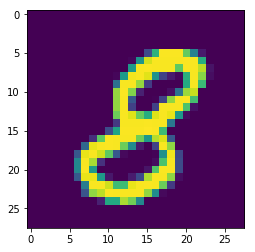

In [17]:
# Visualize one sample 
sample = np.reshape(train.X[5], (28, 28))
plt.imshow(sample)
plt.show()

## Converting a Numpy Array to tf.data.dataset()


Let's say you want to use the `tf.data` module instead of DeepChem's data handling library. Doing this is straightforward and is quite similar to getting a `NumpyDataset` object from numpy arrays.

In [18]:
import tensorflow as tf
data_small = np.random.random((4,5))
label_small = np.random.random((4,))
dataset = tf.data.Dataset.from_tensor_slices((data_small, label_small))
print ("Data\n")
print (data_small)
print ("\n Labels")
print (label_small)

Data

[[0.09102272 0.07158817 0.85294433 0.72889589 0.00564065]
 [0.26971883 0.51840485 0.69322473 0.85085169 0.11202028]
 [0.14868434 0.83661216 0.32333968 0.64312229 0.44279518]
 [0.15123109 0.3443811  0.04610284 0.66125549 0.26025301]]

 Labels
[0.75613112 0.97179618 0.33262846 0.54677704]


## Extracting the numpy dataset from tf.data

In order to extract the numpy array from the `tf.data`, you first need to define an `iterator` to iterate over the `tf.data.Dataset` object and then in the tensorflow session, run over the iterator to get the data instances. Let's have a look at how it's done.

In [19]:
iterator = dataset.make_one_shot_iterator() # iterator
next_element = iterator.get_next()
numpy_data = np.zeros((4, 5))
numpy_label = np.zeros((4,))
sess = tf.Session() # tensorflow session 
for i in range(4):
    data_, label_ = sess.run(next_element) # data_ contains the data and label_ contains the labels that we fed in the previous step
    numpy_data[i, :] = data_
    numpy_label[i] = label_
    
print ("Numpy Data")
print(numpy_data)
print ("\n Numpy Label")
print(numpy_label)

Instructions for updating:
Use `for ... in dataset:` to iterate over a dataset. If using `tf.estimator`, return the `Dataset` object directly from your input function. As a last resort, you can use `tf.compat.v1.data.make_one_shot_iterator(dataset)`.
Numpy Data
[[0.09102272 0.07158817 0.85294433 0.72889589 0.00564065]
 [0.26971883 0.51840485 0.69322473 0.85085169 0.11202028]
 [0.14868434 0.83661216 0.32333968 0.64312229 0.44279518]
 [0.15123109 0.3443811  0.04610284 0.66125549 0.26025301]]

 Numpy Label
[0.75613112 0.97179618 0.33262846 0.54677704]


Now that you have the numpy arrays of `data` and `labels`, you can convert it to `NumpyDataset`.

In [20]:
dataset_ = NumpyDataset(numpy_data, numpy_label) # convert to NumpyDataset
dataset_.X  # printing just to check if the data is same!!

array([[0.09102272, 0.07158817, 0.85294433, 0.72889589, 0.00564065],
       [0.26971883, 0.51840485, 0.69322473, 0.85085169, 0.11202028],
       [0.14868434, 0.83661216, 0.32333968, 0.64312229, 0.44279518],
       [0.15123109, 0.3443811 , 0.04610284, 0.66125549, 0.26025301]])

## Converting NumpyDataset to `tf.data`
This can be easily done by the `make_iterator()` method of `NumpyDataset`. This converts the `NumpyDataset` to `tf.data`. Let's look how it's done!

In [21]:
iterator_ = dataset_.make_iterator() # Using make_iterator for converting NumpyDataset to tf.data
next_element_ = iterator_.get_next()

sess = tf.Session() # tensorflow session 
data_and_labels = sess.run(next_element_) # data_ contains the data and label_ contains the labels that we fed in the previous step


print ("Numpy Data")
print(data_and_labels[0])  # Data in the first index 
print ("\n Numpy Label")
print(data_and_labels[1])  # Labels in the second index

Instructions for updating:
tf.py_func is deprecated in TF V2. Instead, there are two
    options available in V2.
    - tf.py_function takes a python function which manipulates tf eager
    tensors instead of numpy arrays. It's easy to convert a tf eager tensor to
    an ndarray (just call tensor.numpy()) but having access to eager tensors
    means `tf.py_function`s can use accelerators such as GPUs as well as
    being differentiable using a gradient tape.
    - tf.numpy_function maintains the semantics of the deprecated tf.py_func
    (it is not differentiable, and manipulates numpy arrays). It drops the
    stateful argument making all functions stateful.
    
Numpy Data
[[0.26971883 0.51840485 0.69322473 0.85085169 0.11202028]
 [0.14868434 0.83661216 0.32333968 0.64312229 0.44279518]
 [0.09102272 0.07158817 0.85294433 0.72889589 0.00564065]
 [0.15123109 0.3443811  0.04610284 0.66125549 0.26025301]]

 Numpy Label
[0.97179618 0.33262846 0.75613112 0.54677704]
